Shape:  (36881, 24)
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0      5.1     14.3       0.0          1.8       8.9           30.0   
2     19.7     26.2       0.0          7.2       7.2           41.0   
3     16.6     28.0       0.0          9.0      11.3           54.0   
5     15.7     27.3       0.0         11.2       5.6           65.0   
6      9.8     23.9       0.0          4.4      10.5           35.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_S  \
0           7.0           6.0         65.0         47.0  ...         False   
2          19.0          31.0         48.0         50.0  ...         False   
3          28.0          33.0         50.0         41.0  ...         False   
5          11.0          13.0         60.0         86.0  ...         False   
6          15.0          13.0         53.0         29.0  ...         False   

   WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0  

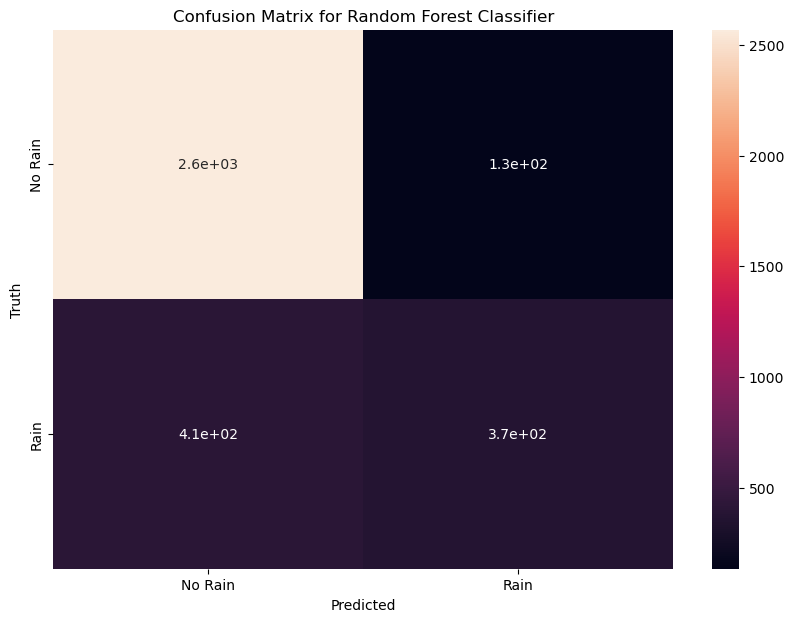


Confusion Matrix: 
 [[2527  175]
 [ 495  279]]

Accuracy:  0.8072497123130035


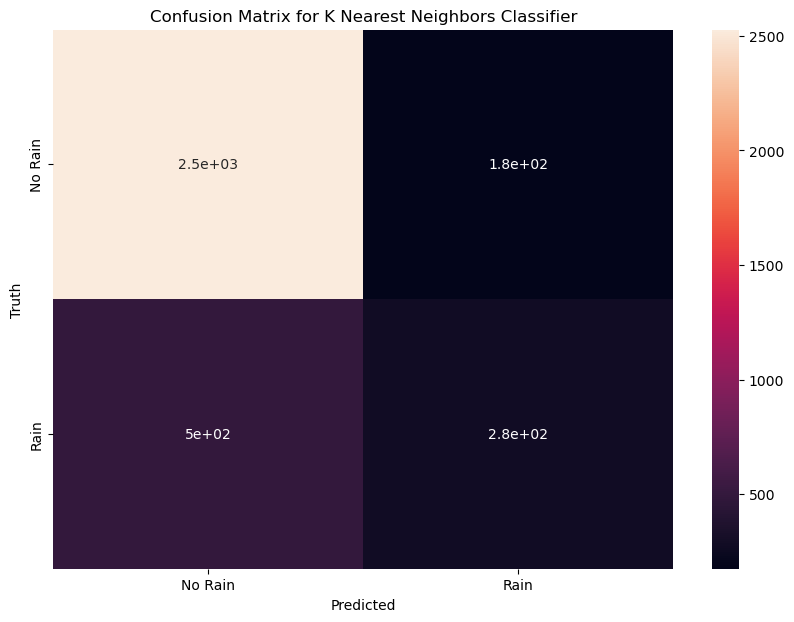


Confusion Matrix: 
 [[2318  384]
 [ 352  422]]

Accuracy:  0.7882623705408516


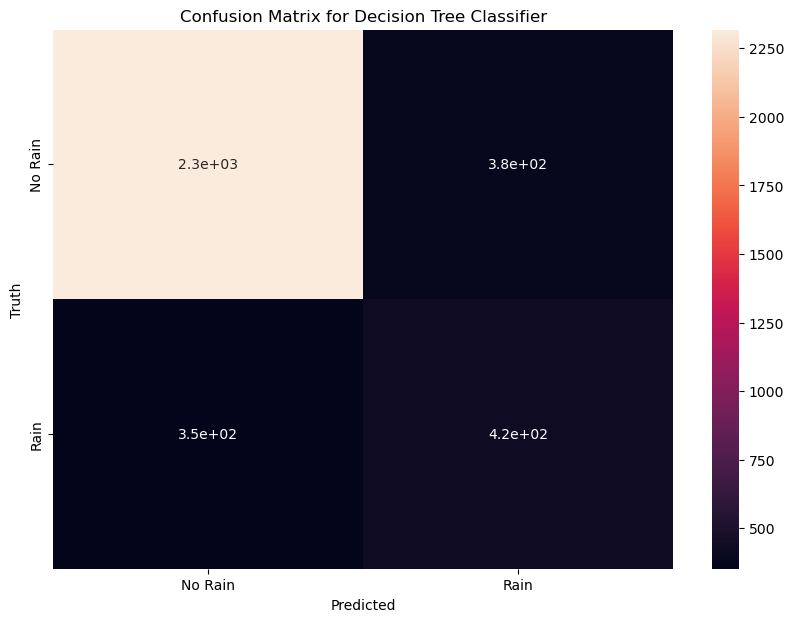


Confusion Matrix: 
 [[2389  313]
 [ 315  459]]

Accuracy:  0.8193325661680092


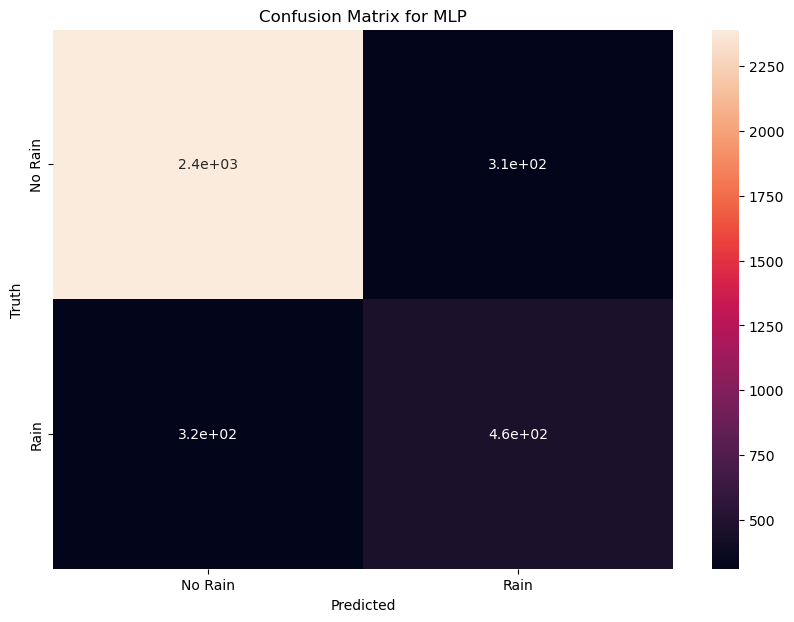

In [1]:
# RainFall Prediction using Machine Learning

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Importing the dataset
dataset = pd.read_csv('weatherAUS.csv')
print("Shape: ",dataset.shape)
dataset.head()

# Data Preprocessing
dataset.isnull().sum()
dataset = dataset.dropna()
dataset = dataset.drop(['Date', 'Location', 'RISK_MM'], axis=1)
dataset = pd.get_dummies(dataset, drop_first=True)
print(dataset.head())

# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n",cm)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: ",accuracy)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Training the K Nearest Neighbors Classification model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n",cm)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: ",accuracy)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for K Nearest Neighbors Classifier')
plt.show()

# Training the Decision Tree Classification model on the Training set  
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n",cm)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: ",accuracy)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Training the Multilayer Perceptron model on the Training set
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 1000)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n",cm)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: ",accuracy)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for MLP')
plt.show()

# Heatmap for RFClassifier, KNN, DTClassifier, MLPClassifier


In [ ]:
# User input data and check where rain or no rain using 